In [1]:
import sys
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sys.path.append('../')
from envir import config

In [2]:
# read in files
files = ['KOKX2016night.csv', 'KOKX2017night.csv',
         'KOKX2018night.csv', 'KOKX2019night.csv']
kokx = pd.DataFrame()
for f in files:
    temp = pd.read_csv(config.dataFol+'clean_nexrad/'+f)
    kokx = kokx.append(temp)

In [3]:
kokx['datetime'] = pd.to_datetime(kokx.datetime).dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
kokx['year'] = pd.DatetimeIndex(kokx['datetime']).year
kokx['month'] = pd.DatetimeIndex(kokx['datetime']).month
kokx['day'] = pd.DatetimeIndex(kokx['datetime']).day
kokx['hour'] = pd.DatetimeIndex(kokx['datetime']).hour
kokx['minute'] = pd.DatetimeIndex(kokx['datetime']).minute
kokx['date'] = pd.to_datetime(kokx.year*10000+kokx.month*100+kokx.day,format='%Y%m%d')
kokx['radar'] = 'KOKX'
kokx.shape

(119750, 23)

In [52]:
kokx.groupby('year').count()

,datetime,mtr,vid,vir,rtr,mt,rt,ff,dd,u,...,airspeed,heading,airspeed_u,airspeed_v,month,day,hour,minute,date,radar
year,,,,,,,,,,,,,,,,,,,,,
2015,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
2016,32314,32314,32314,32314,32314,32314,32314,32314,32314,32314,...,32314,32314,32314,32314,32314,32314,32314,32314,32314,32314
2017,31816,31816,31816,31816,31816,31816,31816,31816,31816,31816,...,31816,31816,31816,31816,31816,31816,31816,31816,31816,31816
2018,33869,33869,33869,33869,33869,33869,33869,33869,33869,33869,...,33869,33869,33869,33869,33869,33869,33869,33869,33869,33869
2019,21721,21721,21721,21721,21721,21721,21721,21721,21721,21721,...,21721,21721,21721,21721,21721,21721,21721,21721,21721,21721


In [55]:
kokx[kokx.year > 2016].groupby('year').count().mean()

datetime      29135.333333
mtr           29135.333333
vid           29135.333333
vir           29135.333333
rtr           29135.333333
mt            29135.333333
rt            29135.333333
ff            29135.333333
dd            29135.333333
u             29135.333333
v             29135.333333
height        29135.333333
airspeed      29135.333333
heading       29135.333333
airspeed_u    29135.333333
airspeed_v    29135.333333
month         29135.333333
day           29135.333333
hour          29135.333333
minute        29135.333333
date          29135.333333
radar         29135.333333
dtype: float64

In [4]:
# read in files
files = ['KDIX2016night.csv', 'KDIX2017night.csv',
         'KDIX2018night.csv', 'KDIX2019night.csv']
kdix = pd.DataFrame()
for f in files:
    temp = pd.read_csv(config.dataFol+'clean_nexrad/'+f)
    kdix = kdix.append(temp)

In [5]:
kdix['datetime'] = pd.to_datetime(kdix.datetime).dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
kdix['year'] = pd.DatetimeIndex(kdix['datetime']).year
kdix['month'] = pd.DatetimeIndex(kdix['datetime']).month
kdix['day'] = pd.DatetimeIndex(kdix['datetime']).day
kdix['hour'] = pd.DatetimeIndex(kdix['datetime']).hour
kdix['minute'] = pd.DatetimeIndex(kdix['datetime']).minute
kdix['date'] = pd.to_datetime(kdix.year*10000+kdix.month*100+kdix.day,format='%Y%m%d')
kdix['radar'] = 'KDIX'
kdix.shape

(136156, 23)

In [56]:
kdix[kdix.year > 2016].groupby('year').count().mean()

datetime      33887.666667
mtr           33887.666667
vid           33887.666667
vir           33887.666667
rtr           33887.666667
mt            33887.666667
rt            33887.666667
ff            33887.666667
dd            33887.666667
u             33887.666667
v             33887.666667
height        33887.666667
airspeed      33887.666667
heading       33887.666667
airspeed_u    33887.666667
airspeed_v    33887.666667
month         33887.666667
day           33887.666667
hour          33887.666667
minute        33887.666667
date          33887.666667
radar         33887.666667
dtype: float64

In [6]:
radars = pd.concat([kokx, kdix], axis=0)

In [7]:
radars.describe()

,mtr,vid,vir,rtr,mt,rt,ff,dd,u,v,height,airspeed,heading,airspeed_u,airspeed_v,year,month,day,hour,minute
count,255906.000000,255906.000000,255906.000000,255906.000000,2.559060e+05,2.559060e+05,255906.000000,255906.000000,255906.000000,255906.000000,255906.000000,255906.000000,255906.000000,255906.000000,255906.000000,255906.000000,255906.000000,255906.000000,255906.00000,255906.000000
mean,343.724157,9.071058,99.781638,3780.965722,7.348088e+05,8.082896e+06,9.051708,99.506399,2.586175,0.302015,481.533368,4.853381,97.802066,-0.546843,0.056639,2017.390819,6.236735,15.689202,10.86683,29.493709
std,1322.030591,30.427488,334.702371,14542.336501,7.547241e+05,8.301965e+06,4.593721,86.932861,6.525598,6.728737,271.194603,3.446588,84.780286,3.944468,3.866604,1.061049,3.526743,8.782688,9.11978,17.307471
min,0.000000,0.004385,0.048230,0.000000,1.706356e-01,1.876991e+00,0.000000,-89.997213,-74.170111,-77.885743,115.597081,0.000000,-87.959793,-80.282278,-74.893681,2015.000000,1.000000,1.000000,0.00000,0.000000
25%,8.778131,0.288764,3.176400,96.559439,8.260934e+04,9.087028e+05,6.012951,40.106974,-1.972793,-4.284930,276.443341,2.741888,29.332583,-2.466618,-2.054950,2016.000000,3.000000,8.000000,2.00000,14.000000
50%,34.869399,1.254197,13.796165,383.563393,5.079659e+05,5.587625e+06,8.307667,88.933479,3.002052,0.068130,415.394495,4.017224,95.137213,-0.447147,-0.036781,2017.000000,6.000000,16.000000,5.00000,30.000000
75%,134.985624,4.942247,54.364718,1484.841867,1.089227e+06,1.198150e+07,11.119122,170.311635,7.053846,4.629542,621.884135,6.101891,169.712780,1.499072,1.905703,2018.000000,9.000000,23.000000,21.00000,44.000000
max,39141.509595,698.591324,7684.504560,430556.605550,2.812864e+06,3.094151e+07,85.607595,269.998606,75.864589,83.083329,2617.119812,87.609759,268.459096,67.424280,85.754852,2019.000000,12.000000,31.000000,23.00000,59.000000


In [8]:
# scans per year
radars.groupby(['radar','year']).count()['mtr']

radar  year
KDIX   2015       30
       2016    34463
       2017    36975
       2018    39777
       2019    24911
KOKX   2015       30
       2016    32314
       2017    31816
       2018    33869
       2019    21721
Name: mtr, dtype: int64

In [9]:
radars['dayofyear'] = radars['date'].dt.dayofyear

In [10]:
by_day = radars.groupby(['radar','date']).mean()
by_day.reset_index(inplace=True)

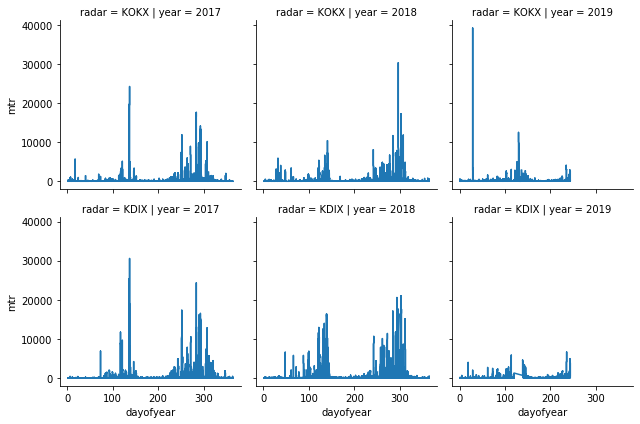

In [11]:
g = sns.FacetGrid(radars[radars.year > 2016], col="year", row='radar')
g = g.map_dataframe(plt.plot, "dayofyear", "mtr")

In [17]:
by_month = radars[radars.year > 2016].groupby(['radar','year', 'month']).mean().reset_index()
by_month.pivot_table(index='month', columns=['year', 'radar'],values=['mtr'])

mtr                                                     \
year          2017                     2018                      2019   
radar         KDIX        KOKX         KDIX         KOKX         KDIX   
month                                                                   
1        12.016371   37.828862    12.039520    23.781025    15.796614   
2        12.602778   13.364847    45.305231    74.446045    20.826424   
3        81.893761   49.360951   135.093626    68.823786   173.008374   
4       436.661829  191.583299   417.558807    93.389785   259.715955   
5       837.127695  909.692661  1733.205020   878.279645   724.657174   
6        79.096470   73.042131    81.171498    45.049646    69.443457   
7        62.694718   69.103461    59.465913    63.693687    95.704368   
8       333.810365  281.161122   398.039718   276.093382   447.155335   
9      1379.727006  888.720280  1118.210550   574.535028  2482.663036   
10     1133.842293  918.302401  1817.745405  1484.595153          NaN   
11      565.608118  358.811059   553.328853   319.261203          NaN   
12       25.084021   28.266294    23.792311    35.401243          NaN   

                    
year                
radar         KOKX  
month               
1       219.113913  
2        30.253074  
3        94.230947  
4       125.182344  
5       527.277933  
6        42.506210  
7        64.234103  
8       278.004114  
9      1077.297580  
10             NaN  
11             NaN  
12             NaN

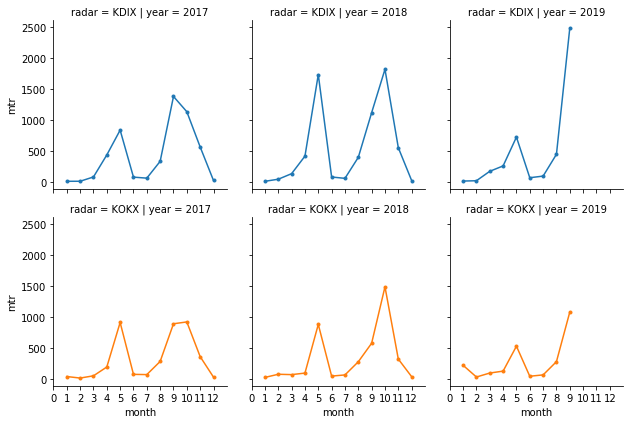

In [26]:
# annual patterns of mtr
g = sns.FacetGrid(by_month[by_month.year > 2016], col="year", row="radar", hue = "radar")
g = (g.map(plt.plot, "month", "mtr", marker=".")
     .set(xlim=(0, 13), xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))

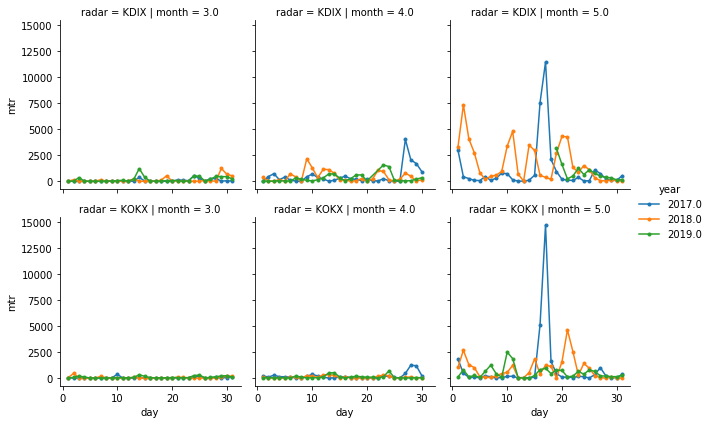

In [27]:
# annual patterns of mtr in March - June
g = sns.FacetGrid(by_day[(by_day['month']>=3) & (by_day['month']<6) & (by_day['year']>2016)],
                  hue="year", row="radar", col="month")
g = (g.map(plt.plot, "day", "mtr", marker=".").add_legend())

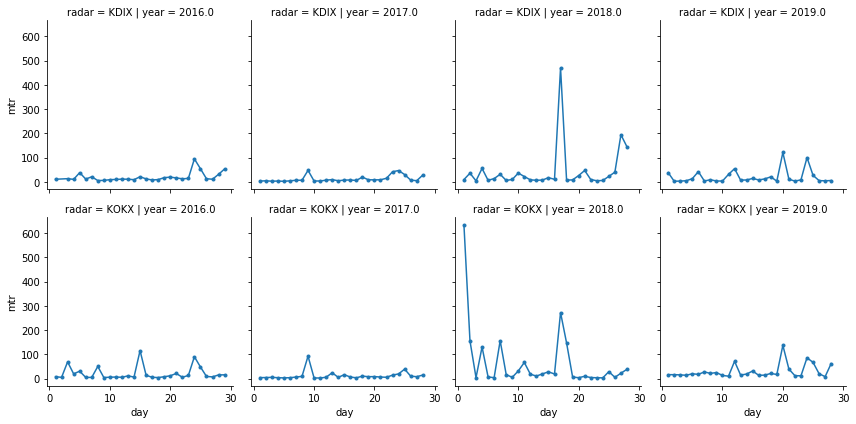

In [28]:
# annual patterns of mtr in March
g = sns.FacetGrid(by_day[by_day['month']==2], col="year", row = "radar")
g = g.map(plt.plot, "day", "mtr", marker=".")

##### Potential Peaks
- 2/25/2016
- 2/9/2017
- 2/18/2018, 2/28/2018
- 2/21/2019, 2/24/2019

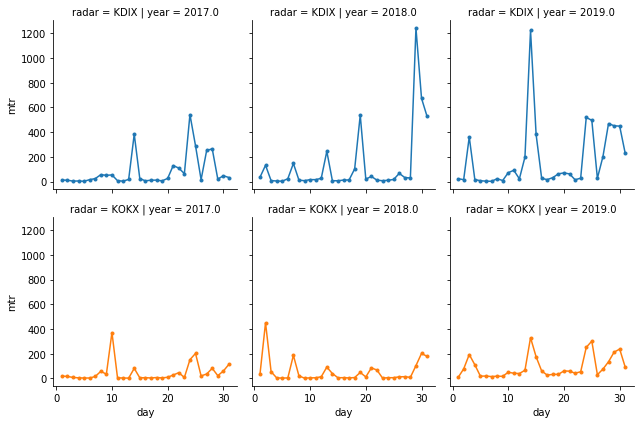

In [30]:
# annual patterns of mtr in March
g = sns.FacetGrid(by_day[(by_day['month']==3) & (by_day['year']>2016)],
                  col="year", row = "radar", hue="radar")
g = g.map(plt.plot, "day", "mtr", marker=".")

##### Potential Peaks
- 3/17/2016, 3/23/2016
- 3/14/2017, 3/25/2017, 3/28/2017
- 3/2/2018, 3/6/2018, 3/13/2018, 3/19/2018, 3/30/2018
- 3/4/2019, 3/15/2019, 3/25/2019,3/29/2019

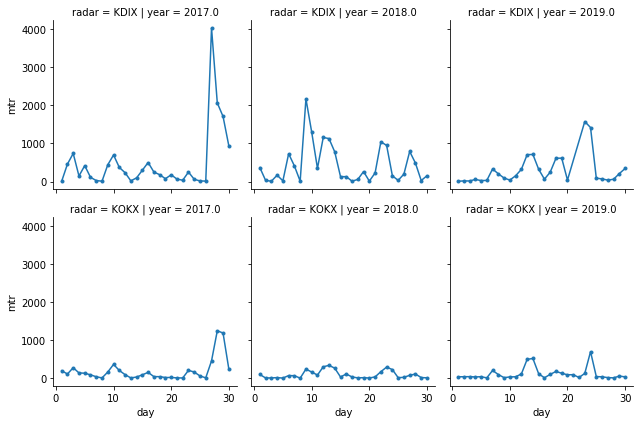

In [31]:
# annual patterns of mtr in April
g = sns.FacetGrid(by_day[(by_day['month']==4) & (by_day['year']>2016)], col="year", row="radar")
g = g.map(plt.plot, "day", "mtr", marker=".")

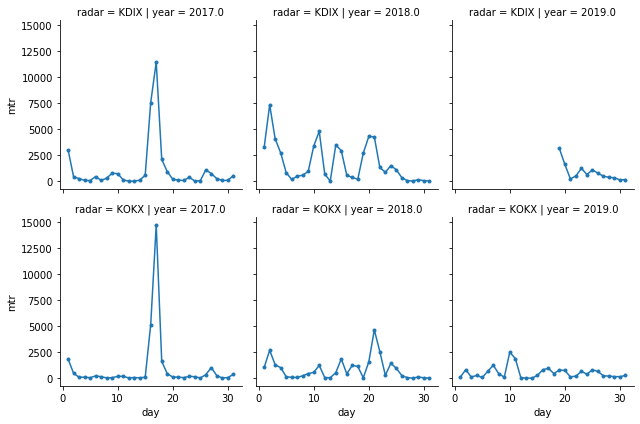

In [32]:
# annual patterns of mtr in May
g = sns.FacetGrid(by_day[(by_day['month']==5) & (by_day['year']>2016)], col="year", row="radar")
g = g.map(plt.plot, "day", "mtr", marker=".")

### Deeper Look at By Hour By Height

#### Peaks in the month of May
Since the above line plots seem to demonstrate peaks in May for each year. Let's sample a couple of dates to look at both the mtr and the height metric for exploration.
##### Dates to Examine:
* May 17, 2017
* May 22, 2018
* May 20, 2019

In [57]:
may_peaks = ['2017-03-25', '2018-03-29', '2019-03-14']
by_day[by_day.date.isin(may_peaks)]

,radar,date,mtr,vid,vir,rtr,mt,rt,ff,dd,...,airspeed,heading,airspeed_u,airspeed_v,year,month,day,hour,minute,dayofyear
449,KDIX,2017-03-25,290.422058,4.349327,47.842595,3194.642641,57106.432234,6.281708e+05,13.054268,45.497814,...,8.007031,-0.843867,-0.324231,7.104770,2017.0,3.0,25.0,13.019231,30.105769,84.0
818,KDIX,2018-03-29,1242.421062,14.395813,158.353942,13666.631683,118485.189539,1.303337e+06,11.314371,46.690477,...,4.878305,66.845556,2.992470,2.727348,2018.0,3.0,29.0,8.347826,29.304348,88.0
1167,KDIX,2019-03-14,1224.239251,17.555434,193.109769,13466.631765,61026.418355,6.712906e+05,20.097007,28.564122,...,9.553276,29.994928,3.312769,7.719546,2019.0,3.0,14.0,10.519608,29.480392,73.0
1768,KOKX,2017-03-25,203.116122,3.072513,33.797647,2234.277337,67571.996747,7.432920e+05,12.710171,130.496798,...,6.413976,66.857514,2.891673,1.941672,2017.0,3.0,25.0,11.810526,30.294737,84.0
2135,KOKX,2018-03-29,104.065269,1.671590,18.387487,1144.717964,86461.511632,9.510766e+05,12.539763,38.061051,...,6.721063,60.875059,5.308996,2.868199,2018.0,3.0,29.0,10.577465,28.577465,88.0
2484,KOKX,2019-03-14,330.051677,5.359899,58.958887,3630.568448,169000.562903,1.859006e+06,17.206985,44.115831,...,7.905667,61.017572,6.239839,2.892597,2019.0,3.0,14.0,9.784091,28.250000,73.0


In [58]:
radars[radars.date.isin(may_peaks)].groupby('date').count()

,datetime,mtr,vid,vir,rtr,mt,rt,ff,dd,u,...,airspeed_v,year,month,day,hour,minute,radar,dayofyear,utc_datetime,utc_hour
date,,,,,,,,,,,,,,,,,,,,,
2017-03-25,199,199,199,199,199,199,199,199,199,199,...,199,199,199,199,199,199,199,199,199,199
2018-03-29,163,163,163,163,163,163,163,163,163,163,...,163,163,163,163,163,163,163,163,163,163
2019-03-14,190,190,190,190,190,190,190,190,190,190,...,190,190,190,190,190,190,190,190,190,190


In [59]:
radars.datetime.diff().mean()

Timedelta('0 days 00:07:32.226228')

In [60]:
radars['utc_datetime'] = radars.datetime.dt.tz_convert('UTC')
radars['utc_hour'] = pd.DatetimeIndex(radars['utc_datetime']).hour

2017-03-25
Average time in minutes between scans
0 days 00:05:24
2018-03-29
Average time in minutes between scans
0 days 00:09:48
2019-03-14
Average time in minutes between scans
0 days 00:07:12


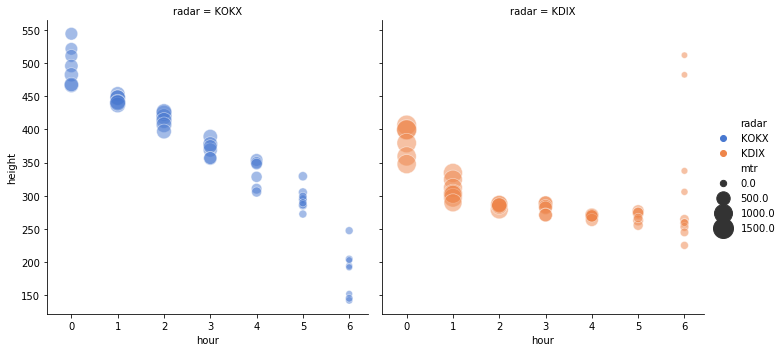

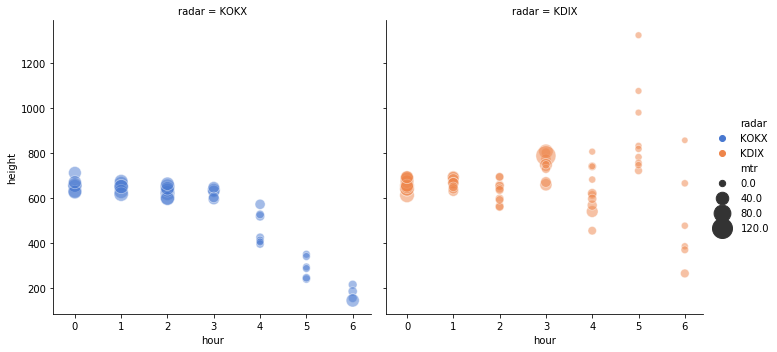

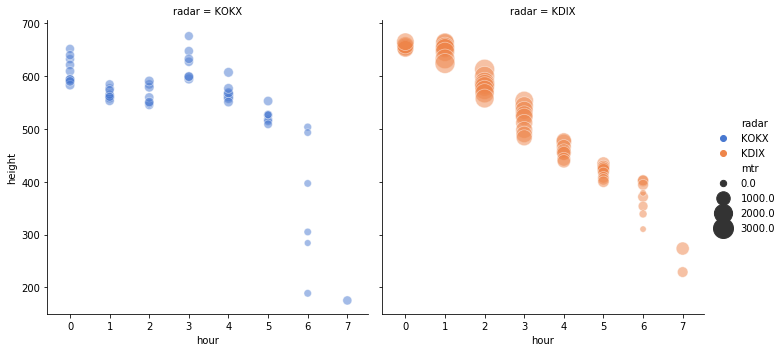

In [69]:
for i in may_peaks:
    print(i)
    print("Average time in minutes between scans")
    print(radars[radars.date.isin([i])].datetime.diff().median())
    sns.relplot(x='hour', y="height", size="mtr", hue = "radar", col="radar",
                sizes=(40, 400), alpha=.5, palette="muted",
                height=5, data=radars[(radars.date.isin([i])) & (radars.hour < 10)])

In [127]:
radar_hour = radars[radars.year > 2016].groupby(['radar', 'hour', 'month']).mean().reset_index()

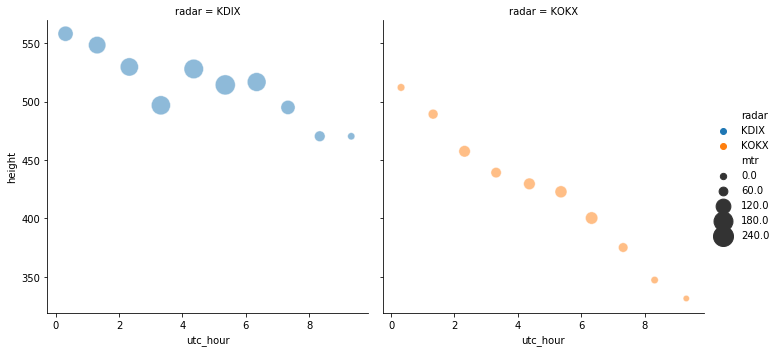

In [136]:
sns.relplot(x='utc_hour', y="height", size="mtr", col="radar", hue = "radar",
            sizes=(40, 400), alpha=.5, 
            height=5, data=radar_hour[(radar_hour.utc_hour < 10) & (radar_hour.month ==3)])